<a href="https://colab.research.google.com/github/palakkapahi15/Fun_Quiz/blob/main/Lung_Cancer_Classification_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import shutil
import pathlib
import itertools
import torch
from torchvision import transforms
from PIL import Image
import pickle
!pip install shap
import shap
!pip install lime
import lime

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3ce0d0894db3e01302bd433d6fd8d5bb8ddcf5149057a944f844e0ba6e55348e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def find_image_size(dataset_dir):
    # Get a list of all image files in the dataset directory
    image_files = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Check if the image_files list is empty
    if not image_files:
        raise ValueError("No image files found in the directory:", dataset_dir)

    # Take the first image from the list to get its size
    sample_image_path = image_files[0]

    # Load the sample image
    sample_image = load_img(sample_image_path)

    # Get the size of the loaded image
    image_size = sample_image.size

    return image_size

# Replace 'dataset_dir' with the path to your dataset directory
dataset_dir = '/content/drive/My Drive/lung_image_sets/lung_benign'

try:
    image_size = find_image_size(dataset_dir)
    print("Image size in the dataset:", image_size)
except ValueError as e:
    print(e)

Image size in the dataset: (768, 768)


In [ ]:
import os
from collections import defaultdict
from PIL import Image

def get_image_sizes(dataset_dir):
    image_sizes = defaultdict(int)

    # Get a list of all image files in the dataset directory
    image_files = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

    for file in image_files:
        # Open each image and get its size
        with Image.open(file) as img:
            size = img.size
            # Convert size tuple to a string for easier tracking
            size_str = str(size)
            # Increment the count for this size
            image_sizes[size_str] += 1

    return image_sizes

# Replace 'dataset_dir' with the path to your dataset directory
dataset_dir = '/content/drive/My Drive/lung_image_sets/lung_benign'
image_sizes = get_image_sizes(dataset_dir)

# Print the results
print("Types of image sizes and their corresponding counts:")
for size, count in image_sizes.items():
    print(f"Size: {size}, Count: {count}")


Types of image sizes and their corresponding counts:
Size: (768, 768), Count: 5000


In [ ]:
import os
from collections import defaultdict
from PIL import Image

def get_image_sizes(dataset_dir):
    image_sizes = defaultdict(int)

    # Get a list of all image files in the dataset directory
    image_files = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

    for file in image_files:
        # Open each image and get its size
        with Image.open(file) as img:
            size = img.size
            # Convert size tuple to a string for easier tracking
            size_str = str(size)
            # Increment the count for this size
            image_sizes[size_str] += 1

    return image_sizes

# Replace 'dataset_dir' with the path to your dataset directory
dataset_dir = '/content/drive/My Drive/lung_image_sets/lung_aca'
image_sizes = get_image_sizes(dataset_dir)

# Print the results
print("Types of image sizes and their corresponding counts:")
for size, count in image_sizes.items():
    print(f"Size: {size}, Count: {count}")


Types of image sizes and their corresponding counts:
Size: (768, 768), Count: 5000


In [ ]:
import os
from collections import defaultdict
from PIL import Image

def get_image_sizes(dataset_dir):
    image_sizes = defaultdict(int)

    # Get a list of all image files in the dataset directory
    image_files = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

    for file in image_files:
        # Open each image and get its size
        with Image.open(file) as img:
            size = img.size
            # Convert size tuple to a string for easier tracking
            size_str = str(size)
            # Increment the count for this size
            image_sizes[size_str] += 1

    return image_sizes

# Replace 'dataset_dir' with the path to your dataset directory
dataset_dir = '/content/drive/My Drive/lung_image_sets/lung_scc'
image_sizes = get_image_sizes(dataset_dir)

# Print the results
print("Types of image sizes and their corresponding counts:")
for size, count in image_sizes.items():
    print(f"Size: {size}, Count: {count}")


Types of image sizes and their corresponding counts:
Size: (768, 768), Count: 5000


In [ ]:
dir = '/content/drive/My Drive/lung_image_sets'
labels = os.listdir(dir)
print("No. of labels in the Training set: {}".format(len(labels)))
print("-----------------")
os.chdir(dir)
for label in labels:
    print("{}, {} files".format(label, len(os.listdir(dir+ '//' +label))))

No. of labels in the Training set: 3
-----------------
lung_scc, 5000 files
lung_aca, 5000 files
lung_benign, 5000 files


In [ ]:
# Define directories for original dataset and new split datasets
original_dataset_dir = '/content/drive/My Drive/lung_image_sets'
base_dir = '/content/drive/My Drive/segregated_lung_image_sets'

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# Define subdirectories for each class in train, validate, and test directories
classes = ['lung_scc', 'lung_aca', 'lung_benign']  # Update with your class names

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

'\n# Split the dataset into train, validation, and test sets\nfor class_name in classes:\n    class_dir = os.path.join(original_dataset_dir, class_name)\n    filenames = os.listdir(class_dir)\n    train_files, test_files = train_test_split(filenames, test_size=0.2, random_state=42)\n    train_files, validation_files = train_test_split(train_files, test_size=0.2, random_state=42)\n\n    # Move files to train directory\n    for filename in train_files:\n        src = os.path.join(class_dir, filename)\n        dst = os.path.join(train_dir, class_name, filename)\n        shutil.copyfile(src, dst)\n\n    # Move files to validation directory\n    for filename in validation_files:\n        src = os.path.join(class_dir, filename)\n        dst = os.path.join(validation_dir, class_name, filename)\n        shutil.copyfile(src, dst)\n\n    # Move files to test directory\n    for filename in test_files:\n        src = os.path.join(class_dir, filename)\n        dst = os.path.join(test_dir, class_nam

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# List all classes
classes = os.listdir(original_dataset_dir)

# Split the dataset into train, validation, and test sets for each class
for class_name in classes:
    class_dir = os.path.join(original_dataset_dir, class_name)
    filenames = os.listdir(class_dir)

    # Split filenames into train, validation, and test sets
    train_files, test_files = train_test_split(filenames, test_size=0.2, random_state=42)
    train_files, validation_files = train_test_split(train_files, test_size=0.2, random_state=42)

    # Copy images to train directory
    for filename in train_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, class_name, filename)
        shutil.copy(src, dst)

    # Copy images to validation directory
    for filename in validation_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(validation_dir, class_name, filename)
        shutil.copy(src, dst)

    # Copy images to test directory
    for filename in test_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, class_name, filename)
        shutil.copy(src, dst)

print("Images have been copied to train, validation, and test directories.")


Images have been copied to train, validation, and test directories.


In [ ]:
original_dataset_dir = '/content/drive/My Drive/lung_image_sets'
segregated_dataset_dir = '/content/drive/My Drive/segregated_lung_image_sets'
train_dir = '/content/drive/My Drive/segregated_lung_image_sets/train'
validation_dir =  '/content/drive/My Drive/segregated_lung_image_sets/validation'
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

In [ ]:
print(type(train_dir))


<class 'str'>


In [ ]:
print(train_dir)

/content/drive/My Drive/segregated_lung_image_sets/train


In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=32,
    image_size=(224, 224),
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    shuffle=True,
    batch_size=32,
    image_size=(224, 224),
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    batch_size=32,
    image_size=(224, 224),
)

Found 9600 files belonging to 3 classes.
Found 2400 files belonging to 3 classes.
Found 3000 files belonging to 3 classes.


In [ ]:
def preprocess_image(image, label):
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert to float32
    return image, label

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_image)
validation_dataset = validation_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

In [ ]:
# Define batch size
batch_size = 30

# Create ImageDataGenerators for train, validation, and test data
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1] range
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),  # Resize images to 224x224
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  # Assuming categorical labels

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Example usage of train, validation, and test generators
# Iterate over batches from the generators


Found 9600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
#class_count = len(list(train_gen.class_indices.keys()))

classification_model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    #Dropout(0.25),  # Adding Dropout with dropout rate of 0.25

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    #Dropout(0.25),  # Adding Dropout with dropout rate of 0.25

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    #Dropout(0.25),  # Adding Dropout with dropout rate of 0.25

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adding Dropout with dropout rate of 0.25

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    #Dropout(0.25),  # Adding Dropout with dropout rate of 0.25

    Flatten(),
    Dense(256,activation = "relu"),
    Dropout(0.5),  # Adding Dropout with dropout rate of 0.5
    Dense(64,activation = "relu"),
    Dense(3, activation = "softmax")
])


In [ ]:
classification_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore weights to the best model observed during training

# Define model checkpoint callback to save the best model during training
checkpoint = ModelCheckpoint('classification_best_model.h5',  # Filepath to save the best model
                             monitor='val_loss',  # Monitor validation loss
                             save_best_only=True,  # Save only the best model
                             mode='min',          # Mode of monitoring (minimize validation loss)
                             verbose=1)           # Verbosity mode (1 for updates)

csv_logger = CSVLogger('/content/drive/MyDrive/training_history.csv')

In [ ]:
'''
csv_logger = CSVLogger('/content/drive/MyDrive/training_history.csv')

# Train the model
history = model.fit(..., callbacks=[checkpoint_callback, csv_logger])

# Save the training history to a file
with open('/content/drive/MyDrive/training_history.pkl', 'wb') as f:
    pickle.dump(history, f)
'''

In [ ]:
classification_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
#train model
training_model = classification_model.fit(x=train_generator, epochs= 100, validation_data=valid_generator,
                    callbacks=[early_stopping, checkpoint, csv_logger])

In [ ]:

# Load the model from the checkpoint
model = load_model('/content/drive/MyDrive/lung_image_sets/classification_best_model.h5')

# Load the training history
with open('/content/drive/MyDrive/training_history.pkl', 'rb') as f:
    history = pickle.load(f)
'''
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resume training
model.fit(..., initial_epoch=len(history.epoch), ...)
'''

In [ ]:
training_accuracy = training_model.training_model['accuracy']
validation_accuracy = training_model.training_model['val_accuracy']

training_loss = training_model.training_model['loss']
validation_loss = training_model.training_model['val_loss']

epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(6,6))
plt.plot(epochs, training_accuracy, 'green', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'blue', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(6,6))

plt.plot(epochs, training_loss, 'green', label='Training loss')
plt.plot(epochs, validation_loss, 'blue', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
X_train, y_train = train_generator.next()
X_val, y_val = valid_generator.next()
X_test, y_test = test_generator.next()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionResNetV2

# Define paths to your dataset
train_dir = '/content/drive/My Drive/segregated_lung_image_sets/train'
validation_dir = '/content/drive/My Drive/segregated_lung_image_sets/validation'
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

# Image dimensions
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Number of classes
num_classes = 3

# Batch size
batch_size = 30

# Use InceptionResNetV2 as base model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a classification layer with softmax activation for multi-class classification
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

219055592/219055592 [==============================] - 2s 0us/step


In [ ]:
inceptionResNetV2_model_training = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=valid_generator,
          validation_steps=valid_generator.samples // batch_size,
          callbacks=[early_stopping, checkpoint, csv_logger])

Epoch 1/10
320/320 [==============================] - ETA: 0s - loss: 0.1579 - accuracy: 0.9410 
Epoch 1: val_loss improved from inf to 0.10320, saving model to classification_best_model.h5
320/320 [==============================] - 7709s 24s/step - loss: 0.1579 - accuracy: 0.9410 - val_loss: 0.1032 - val_accuracy: 0.9638
Epoch 2/10
320/320 [==============================] - ETA: 0s - loss: 0.0971 - accuracy: 0.9641
Epoch 2: val_loss did not improve from 0.10320
320/320 [==============================] - 94s 294ms/step - loss: 0.0971 - accuracy: 0.9641 - val_loss: 0.1518 - val_accuracy: 0.9404
Epoch 3/10
320/320 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9727
Epoch 3: val_loss improved from 0.10320 to 0.07085, saving model to classification_best_model.h5
320/320 [==============================] - 101s 316ms/step - loss: 0.0728 - accuracy: 0.9727 - val_loss: 0.0709 - val_accuracy: 0.9737
Epoch 4/10
320/320 [==============================] - ETA: 0s - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)

100/100 - 843s - loss: 0.0328 - accuracy: 0.9897 - 843s/epoch - 8s/step

Test accuracy: 0.9896666407585144


In [ ]:
model.save('lung_cancer_classification_model.h5')

In [ ]:
# Save the training history to a file
with open('/content/drive/MyDrive/training_history.pkl', 'wb') as f:
    pickle.dump(inceptionResNetV2_model_training, f)

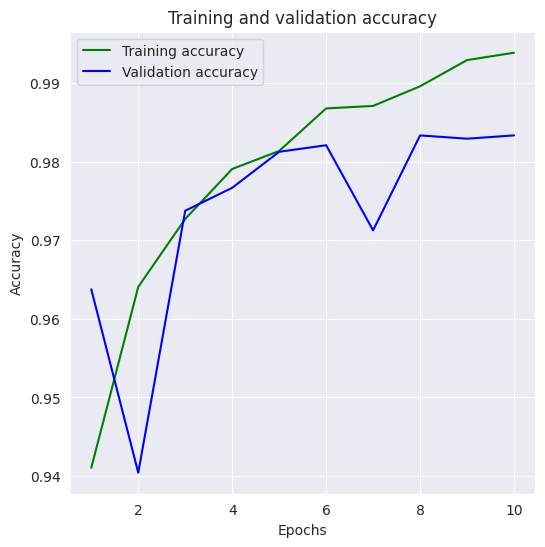

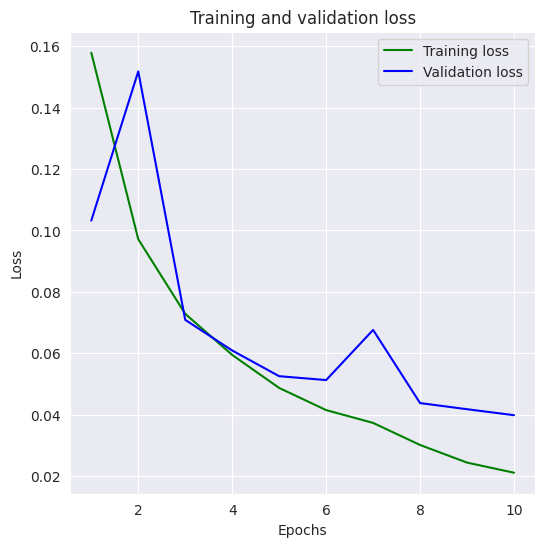

In [ ]:
training_accuracy = inceptionResNetV2_model_training.history['accuracy']
validation_accuracy = inceptionResNetV2_model_training.history['val_accuracy']

training_loss = inceptionResNetV2_model_training.history['loss']
validation_loss = inceptionResNetV2_model_training.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(6,6))
plt.plot(epochs, training_accuracy, 'green', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'blue', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(6,6))

plt.plot(epochs, training_loss, 'green', label='Training loss')
plt.plot(epochs, validation_loss, 'blue', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

In [ ]:
# Define batch size
batch_size = 30

# Create ImageDataGenerators for train, validation, and test data
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1] range
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(299, 299),  # Resize images to 224x224
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  # Assuming categorical labels

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                    target_size=(299, 299),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(299, 299),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Example usage of train, validation, and test generators
# Iterate over batches from the generators
'''
for batch in train_generator:
    # 'batch' is a tuple containing (images, labels)
    images, labels = batch
    # Perform training iteration using 'images' and 'labels'
    break  # Exit loop after processing one batch (remove this line to iterate over all batches)
'''

Found 9600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


"\nfor batch in train_generator:\n    # 'batch' is a tuple containing (images, labels)\n    images, labels = batch\n    # Perform training iteration using 'images' and 'labels'\n    break  # Exit loop after processing one batch (remove this line to iterate over all batches)\n"

In [ ]:
inceptionResNetV2_pred = model.predict(X_test)
print(inceptionResNetV2_pred)

1/1 [==============================] - 20s 20s/step
[[2.91757900e-02 1.60251275e-07 9.70824063e-01]
 [6.43851887e-03 9.93560255e-01 1.13987539e-06]
 [3.40888128e-02 2.84109433e-07 9.65910912e-01]
 [6.80150032e-01 3.34387623e-05 3.19816589e-01]
 [9.92540479e-01 2.07884834e-04 7.25164311e-03]
 [7.16789216e-02 1.74215929e-05 9.28303659e-01]
 [9.85653460e-01 1.13629649e-05 1.43351555e-02]
 [8.34508799e-04 9.99165475e-01 1.55793778e-09]
 [3.33236158e-02 9.66675401e-01 1.06060122e-06]
 [9.99180734e-01 8.33545200e-05 7.35857466e-04]
 [9.81350064e-01 2.96608914e-06 1.86470188e-02]
 [9.99244076e-05 9.99900043e-01 9.54150647e-10]
 [3.43577005e-04 9.99656439e-01 2.48441445e-09]
 [1.76642323e-03 9.98232961e-01 6.40686551e-07]
 [9.99952853e-01 4.33422647e-05 3.66404629e-06]
 [3.08430772e-02 9.69133198e-01 2.36777123e-05]
 [7.01169338e-05 9.99929845e-01 3.96403022e-10]
 [6.81810852e-05 1.21950150e-09 9.99931753e-01]
 [4.18142378e-02 8.06679338e-07 9.58184958e-01]
 [5.27665066e-03 1.18890789e-07 9.94

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/lung_image_sets/classification_best_model.h5')

# Define class labels
class_labels = ['lung_scc', 'lung_aca', 'lung_benign']

# Directory containing test images
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

# Image dimensions
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Batch size
batch_size = 32

# Data generator for test images
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle the data for proper evaluation
)

# Make predictions on test images
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print("\nClassification Report:")
print(class_report)


Found 3000 images belonging to 3 classes.
94/94 [==============================] - 1717s 18s/step
Confusion Matrix:
[[989   0  11]
 [  1 999   0]
 [ 29   0 971]]

Classification Report:
              precision    recall  f1-score   support

    lung_scc       0.97      0.99      0.98      1000
    lung_aca       1.00      1.00      1.00      1000
 lung_benign       0.99      0.97      0.98      1000

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



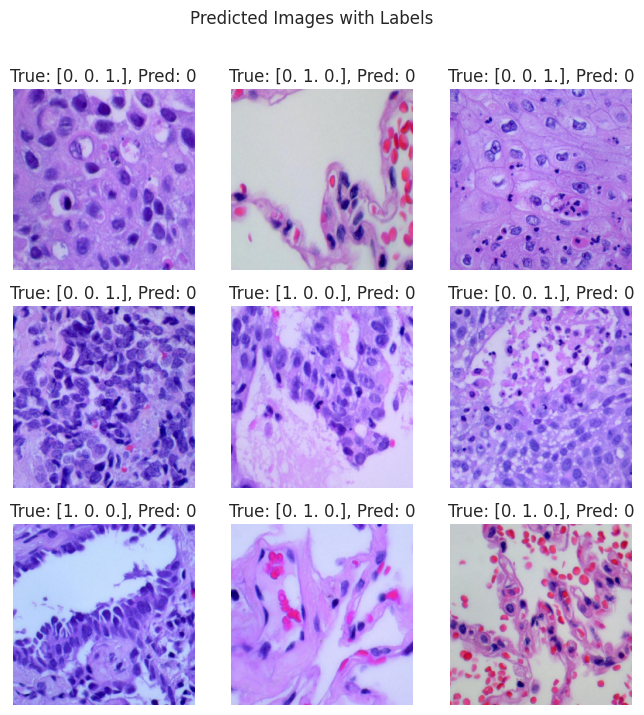

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle('Predicted Images with Labels')

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(299, 299, 3), cmap='gray')
    true_label = y_test[i]  # Integer-encoded label
    pred_label = predicted_labels[i]
    ax.set_title(f'True: {true_label}, Pred: {pred_label}')
    ax.axis('off')

plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.9 MB/s eta 0:00:00


In [ ]:
class_labels = ['lung_scc', 'lung_aca', 'lung_benign']

In [ ]:
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/lung_image_sets/classification_best_model.h5')

# Define class labels
class_labels = ['lung_scc', 'lung_aca', 'lung_benign']

# Directory containing test images
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

# Image dimensions
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Batch size
batch_size = 32

# Data generator for test images
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle the data for proper evaluation
)

# Make predictions on test images
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes


Found 3000 images belonging to 3 classes.
94/94 [==============================] - 1579s 17s/step


Explanable AI implementation

In [ ]:
shap.initjs()

In [ ]:
masker = shap.maskers.Image("inpaint_telea", X_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [ ]:
shap_values = explainer(X_test[:4], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  75%|███████▌  | 3/4 [13:52<03:22, 202.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 4/4 [20:18<00:00, 278.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 5it [26:42, 400.74s/it]


(4, 299, 299, 3, 3)

In [ ]:
# Define the mapping variable
mapping = {
    0: 'lung_scc',
    1: 'lung_aca',
    2: 'lung_benign'
}



In [ ]:
# Convert y_test to a list of integers
y_test_list = [int(i[0]) for i in y_test.tolist()]

# Print the actual labels
print("Actual Labels    : {}".format([mapping[i] for i in y_test_list[:4]]))

Actual Labels    : ['lung_scc', 'lung_scc', 'lung_scc', 'lung_scc']


In [ ]:

probs = model.predict(X_test[:4])
print("Predicted Labels : {}".format([mapping[i] for i in np.argmax(probs, axis=1)]))
print("Probabilities : {}".format(np.max(probs, axis=1)))


1/1 [==============================] - 13s 13s/step
Predicted Labels : ['lung_benign', 'lung_aca', 'lung_benign', 'lung_scc']
Probabilities : [0.97082406 0.9935603  0.9659109  0.68015   ]


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [06:19, 379.21s/it]              


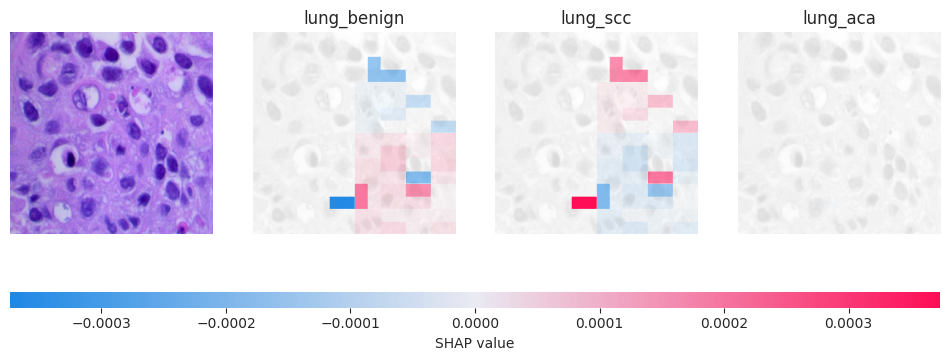

In [ ]:
# Generate the explanations
shap_values = explainer(X_test[:1], outputs=shap.Explanation.argsort.flip[:5])

# Plot the explanations
shap.image_plot(shap_values)

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [07:02, 422.71s/it]              


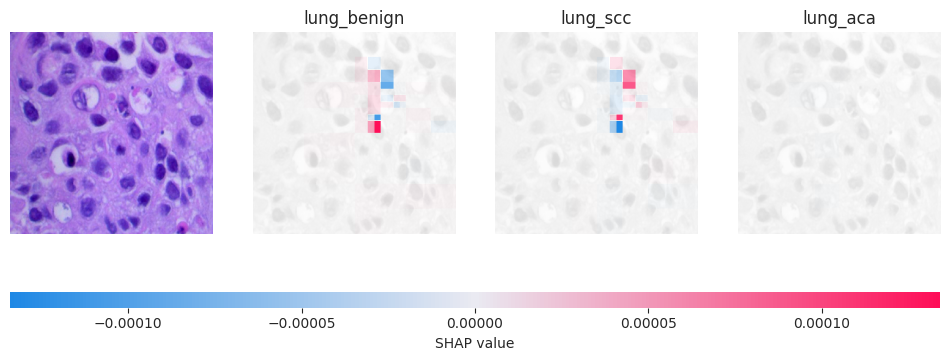

In [ ]:
masker = shap.maskers.Image("inpaint_ns", X_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

shap_values = explainer(X_test[:1], outputs=shap.Explanation.argsort.flip[:5])

shap.image_plot(shap_values)

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [06:05, 365.70s/it]              


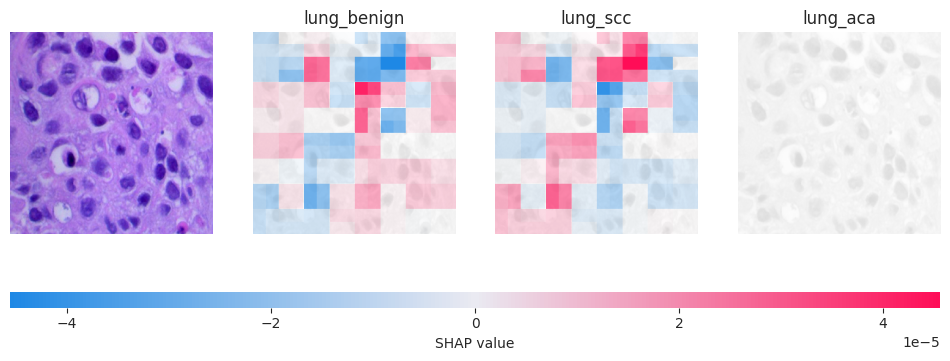

In [ ]:
masker = shap.maskers.Image("blur(28,28)", X_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

shap_values = explainer(X_test[:1], outputs=shap.Explanation.argsort.flip[:5])

shap.image_plot(shap_values)

In [ ]:
from lime import lime_image

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=123)

explainer

In [ ]:
import skimage
from skimage.color import gray2rgb, rgb2gray

import skimage.transform

def make_prediction(color_img):
    resized_img = skimage.transform.resize(color_img, model.input_shape[1:])
    gray_img = resized_img.reshape(-1, model.input_shape[1], model.input_shape[2], 3)
    preds = model.predict(gray_img)
    return preds

In [ ]:
print(model.input_shape)

(None, 299, 299, 3)


In [ ]:
colored_image = gray2rgb(X_test[0].squeeze())
print(colored_image.shape)

(299, 299, 3, 3)


In [ ]:
preds = make_prediction(colored_image)

1/1 [==============================] - 6s 6s/step


In [ ]:
print(gray_image.shape)

(28, 28, 3)


In [ ]:
print(X_test[0].shape)

(299, 299, 3)


In [ ]:
print(preds.shape)

(1, 3)


In [ ]:
num_samples_X_test = X_test.shape[0]
num_samples_y_test = y_test.shape[0]

print(f"Number of samples in X_test: {num_samples_X_test}")
print(f"Number of samples in y_test: {num_samples_y_test}")

Number of samples in X_test: 32
Number of samples in y_test: 32


In [ ]:
# Check if X_test and y_test have the same number of samples
num_samples_X_test = X_test.shape[0]
num_samples_y_test = y_test.shape[0]

if num_samples_X_test != num_samples_y_test:
    raise ValueError("X_test and y_test must have the same number of samples.")

# Explain the instance
explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


ValueError: Found input variables with inconsistent numbers of samples: [1000, 300]

In [ ]:
y_test = y_test[:30]

In [ ]:
X_test = X_test[:300]

In [ ]:
from skimage.segmentation import felzenszwalb, flood_fill, flood

rng = np.random.RandomState(42)
idx = rng.choice(range(len(X_test)))

pred = model.predict(X_test[idx:idx+1]).argmax(axis=1)[0]

explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123)

explanation

1/1 [==============================] - 1s 688ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


ValueError: Found input variables with inconsistent numbers of samples: [1000, 300]

In [ ]:
def check_consistent_length(X_test, y_test):
  """
  Checks that X_test and y_test have the same number of samples.

  Args:
    X_test: A 3D array containing the test samples.
    y_test: A 1D array containing the test labels.

  Raises:
    ValueError: If X_test and y_test have different number of samples.
  """

  num_samples_X_test = X_test.shape[0]
  num_samples_y_test = y_test.shape[0]

  if num_samples_X_test != num_samples_y_test:
    raise ValueError(f"X_test and y_test must have the same number of samples. Found {num_samples_X_test} samples in X_test and {num_samples_y_test} samples in y_test.")

  return True

In [ ]:
import sys

for key, value in globals().copy().items():
    if isinstance(value, np.ndarray):
        print(f"{key}: {value.shape}")

X_train: (30, 299, 299, 3)
y_train: (30, 3)
X_val: (30, 299, 299, 3)
y_val: (30, 3)
X_test: (30, 299, 299, 3)
y_test: (30, 3)
predictions: (3000, 3)
predicted_labels: (3000,)
true_labels: (3000,)
colored_image: (299, 299, 3, 3)
preds: (3, 3)


In [ ]:
explanations = []

for key, value in globals().copy().items():
    if isinstance(value, np.ndarray):
        print(f"{key}: {value.shape}")

# Store the explanation in a list
explanations.append(explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123))

X_train: (30, 299, 299, 3)
y_train: (30, 3)
X_val: (30, 299, 299, 3)
y_val: (30, 3)
X_test: (30, 299, 299, 3)
y_test: (30, 3)
predictions: (3000, 3)
predicted_labels: (3000,)
true_labels: (3000,)
colored_image: (299, 299, 3, 3)
preds: (3, 3)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


ValueError: Found input variables with inconsistent numbers of samples: [1000, 300]

In [ ]:
from skimage.segmentation import felzenszwalb, flood_fill, flood

rng = np.random.RandomState(42)
idx = rng.choice(range(len(X_test)))

pred = model.predict(X_test[idx:idx+1]).argmax(axis=1)[0]

explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123)

explanation

1/1 [==============================] - 1s 775ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


ValueError: Found input variables with inconsistent numbers of samples: [1000, 300]

In [ ]:
num_samples_X_test = X_test.shape[0]
num_samples_y_test = y_test.shape[0]

print(f"Number of samples in X_test: {num_samples_X_test}")
print(f"Number of samples in y_test: {num_samples_y_test}")

Number of samples in X_test: 30
Number of samples in y_test: 30


In [ ]:
# Get the predicted label for the selected image
pred = model.predict(X_test[idx].reshape(1, 299, 299, 3)).argmax(axis=1)[0]

# Generate explanation for the predicted label using LIME
explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123)

# Get image and mask for the predicted label
img, mask = explanation.get_image_and_mask(pred, positive_only=True, hide_rest=True)

img.shape, mask.shape

In [ ]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def plot_comparison(main_image, img, mask):
    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(141)
    ax.imshow(main_image, cmap="gray");
    ax.set_title("Original Image")
    ax = fig.add_subplot(142)
    ax.imshow(img);
    ax.set_title("Image")
    ax = fig.add_subplot(143)
    ax.imshow(mask);
    ax.set_title("Mask")
    ax = fig.add_subplot(144)
    ax.imshow(mark_boundaries(img, mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");

plot_comparison(X_test[idx], img, mask)

In [ ]:
plot_comparison(X_test[idx], img, mask)

In [ ]:
#Segmentation
from skimage.segmentation import felzenszwalb

rng = np.random.RandomState(42)
idx = rng.choice(range(len(X_test)))

# Get the predicted label for the selected image
pred = model.predict(X_test[idx].reshape(1, 224, 224, 3)).argmax(axis=1)[0]

# Generate explanation for the predicted label using LIME
explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123)

# Get image and mask for the predicted label
img, mask = explanation.get_image_and_mask(pred, positive_only=True, hide_rest=True)

img.shape, mask.shape

In [ ]:
from skimage.segmentation import felzenszwalb, flood_fill, flood

rng = np.random.RandomState(42)
idx = rng.choice(range(len(X_test)))
'''
print("Actual Target Value     : {}".format(mapping[y_test[idx][0]]))
pred = model.predict(X_test[idx:idx+1]).argmax(axis=1)[0]
print("Predicted Target Values : {}".format(mapping[pred]))
'''
# Ensure X_test and y_test have the same number of samples
assert X_test.shape[0] == y_test.shape[0], "X_test and y_test must have the same number of samples."

print("Actual Target Value     : {}".format(mapping[y_test[idx][0]]))
pred = model.predict(X_test[idx:idx+1]).argmax(axis=1)[0]
print("Predicted Target Values : {}".format(mapping[pred]))
# Keep the rest of the code unchanged
'''
preds = make_prediction(colored_image)
print("Actual Target Value     : {}".format(mapping[y_test[idx][0]]))
print("Predicted Target Values : {}".format(mapping[preds]))
'''
explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123)

explanation

Actual Target Value     : lung_aca
1/1 [==============================] - 1s 528ms/step
Predicted Target Values : lung_scc


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


ValueError: Found input variables with inconsistent numbers of samples: [1000, 300]

In [ ]:
#Pixels Contributing Positively to Prediction
img, mask = explanation.get_image_and_mask(Y_test[idx], positive_only=True, hide_rest=True)

img.shape, mask.shape

In [ ]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def plot_comparison(main_image, img, mask):
    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(141)
    ax.imshow(main_image, cmap="gray");
    ax.set_title("Original Image")
    ax = fig.add_subplot(142)
    ax.imshow(img);
    ax.set_title("Image")
    ax = fig.add_subplot(143)
    ax.imshow(mask);
    ax.set_title("Mask")
    ax = fig.add_subplot(144)
    ax.imshow(mark_boundaries(img, mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");

plot_comparison(X_test[idx], img, mask)

In [ ]:
#Pixels Contributing Negatively to Prediction
img, mask = explanation.get_image_and_mask(Y_test[idx], positive_only=False, negative_only=True, hide_rest=True)

img.shape, mask.shape

In [ ]:
plot_comparison(X_test[idx], img, mask)

In [ ]:
#True Predictions With Segmentation Method
from skimage.segmentation import felzenszwalb

rng = np.random.RandomState(42)
idx = rng.choice(range(len(X_test)))

print("Actual Target Value     : {}".format(mapping[Y_test[idx]]))
pred = model.predict(X_test[idx:idx+1]).argmax(axis=1)[0]
print("Predicted Target Values : {}".format(mapping[pred]))

explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction,
                                         segmentation_fn=felzenszwalb, random_seed=123)

explanation

In [ ]:
#Pixels Contributing Positively to Prediction
img, mask = explanation.get_image_and_mask(y_test[idx], positive_only=True, hide_rest=True)

plot_comparison(X_test[idx], img, mask)

In [ ]:
#Pixels Contributing Negatively to Prediction
img, mask = explanation.get_image_and_mask(Y_test[idx], positive_only=False, negative_only=True, hide_rest=True)

plot_comparison(X_test[idx], img, mask)


In [ ]:
test_image_files = os.listdir(test_dir)
print(test_image_files)

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
test_generator.classes = np.array(test_generator.classes)
test_generator.classes = np.expand_dims(test_generator.classes, axis=1)
test_generator.classes = np.tile(test_generator.classes, (1, 3))

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionResNetV2

# Define paths to your dataset
train_dir = '/content/drive/My Drive/segregated_lung_image_sets/train'
validation_dir = '/content/drive/My Drive/segregated_lung_image_sets/validation'
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

# Image dimensions
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Number of classes
num_classes = 3

# Batch size
batch_size = 32

# Use InceptionResNetV2 as base model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a dropout layer
x = Dropout(0.5)(x)

# Add a fully-connected layer with fewer neurons
x = Dense(512, activation='relu')(x)

# Add another dropout layer
x = Dropout(0.5)(x)

# Add a classification layer with softmax activation for multi-class classification
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

'''
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')
'''

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_203 (Conv2D)         (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_203 (B  (None, 149, 149, 32)         96        ['conv2d_203[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_203 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_20

"\n# Evaluate the model\nloss, accuracy = model.evaluate(test_generator)\nprint(f'Test accuracy: {accuracy * 100:.2f}%')\n"

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore weights to the best model observed during training

# Define model checkpoint callback to save the best model during training
checkpoint = ModelCheckpoint('IR_classification_best_model.h5',  # Filepath to save the best model
                             monitor='val_loss',  # Monitor validation loss
                             save_best_only=True,  # Save only the best model
                             mode='min',          # Mode of monitoring (minimize validation loss)
                             verbose=1)           # Verbosity mode (1 for updates)

csv_logger = CSVLogger('/content/drive/MyDrive/IR_training_history.csv')

In [ ]:
inceptionResNetV2_model_training_new= model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=20,
          validation_data=valid_generator,
          validation_steps=valid_generator.samples // batch_size,
          callbacks=[early_stopping, checkpoint, csv_logger])

Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.9393 
Epoch 1: val_loss improved from inf to 0.01382, saving model to IR_classification_best_model.h5
300/300 [==============================] - 5921s 19s/step - loss: 0.1523 - accuracy: 0.9393 - val_loss: 0.0138 - val_accuracy: 0.9947
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9934
Epoch 2: val_loss did not improve from 0.01382
300/300 [==============================] - 383s 1s/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0144 - val_accuracy: 0.9956
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9916
Epoch 3: val_loss did not improve from 0.01382
300/300 [==============================] - 211s 703ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.0193 - val_accuracy: 0.9947
Epoch 4/20
300/300 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9977
Epoch 4: val_loss did no

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print("\nTest accuracy:", test_acc)

100/100 [==============================] - 1648s 17s/step - loss: 0.0148 - accuracy: 0.9947

Test accuracy: 0.9946666955947876


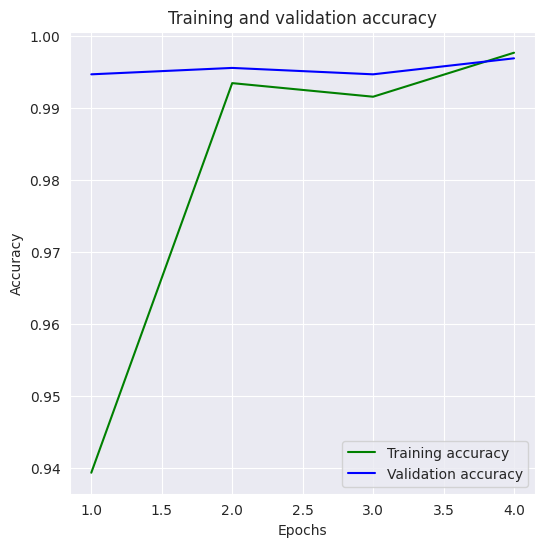

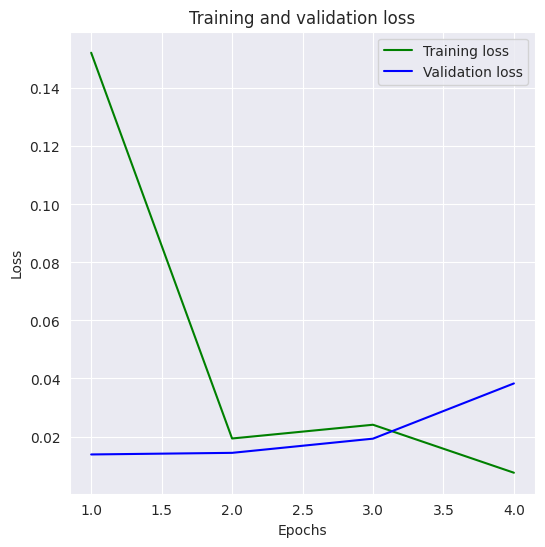

In [ ]:
training_accuracy = inceptionResNetV2_model_training_new.history['accuracy']
validation_accuracy = inceptionResNetV2_model_training_new.history['val_accuracy']

training_loss = inceptionResNetV2_model_training_new.history['loss']
validation_loss = inceptionResNetV2_model_training_new.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(6,6))
plt.plot(epochs, training_accuracy, 'green', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'blue', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(6,6))

plt.plot(epochs, training_loss, 'green', label='Training loss')
plt.plot(epochs, validation_loss, 'blue', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Load the trained model
model = tf.keras.models.load_model('/content/IR_classification_best_model.h5')

# Define class labels
class_labels = ['lung_scc', 'lung_aca', 'lung_benign']

# Directory containing test images
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

# Image dimensions
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Batch size
batch_size = 32

# Data generator for test images
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle the data for proper evaluation
)

# Make predictions on test images
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print("\nClassification Report:")
print(class_report)


Found 3000 images belonging to 3 classes.
94/94 [==============================] - 52s 462ms/step
Confusion Matrix:
[[976   4  20]
 [  2 998   0]
 [  6   0 994]]

Classification Report:
              precision    recall  f1-score   support

    lung_scc       0.99      0.98      0.98      1000
    lung_aca       1.00      1.00      1.00      1000
 lung_benign       0.98      0.99      0.99      1000

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
print("Shape of X_test:", X_test.shape)

Shape of X_test: (30, 224, 224, 3)


In [ ]:
class_labels = ['lung_scc', 'lung_aca', 'lung_benign']

In [ ]:
# Load the trained model
model = tf.keras.models.load_model('/content/IR_classification_best_model.h5')

# Define class labels
class_labels = ['lung_scc', 'lung_aca', 'lung_benign']

# Directory containing test images
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

# Image dimensions
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Batch size
batch_size = 32

# Data generator for test images
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle the data for proper evaluation
)

# Make predictions on test images
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionResNetV2

# Define paths to your dataset
train_dir = '/content/drive/My Drive/segregated_lung_image_sets/train'
validation_dir = '/content/drive/My Drive/segregated_lung_image_sets/validation'
test_dir = '/content/drive/My Drive/segregated_lung_image_sets/test'

# Image dimensions
img_width, img_height = 299, 299
input_shape = (img_width, img_height, 3)

# Number of classes
num_classes = 3

# Batch size
batch_size = 30

# Use InceptionResNetV2 as base model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a classification layer with softmax activation for multi-class classification
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
# Print the total number of layers
print(f'Total number of layers in the model: {len(model.layers)}')


Total number of layers in the model: 783


In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)

Found 9600 files belonging to 3 classes.
Found 2400 files belonging to 3 classes.
Found 3000 files belonging to 3 classes.


In [ ]:
# Define batch size
batch_size = 30

# Create ImageDataGenerators for train, validation, and test data
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1] range
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(299, 299),  # Resize images to 224x224
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  # Assuming categorical labels

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                    target_size=(299, 299),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(299, 299),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Example usage of train, validation, and test generators
# Iterate over batches from the generators


Found 9600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
X_train, y_train = train_generator.next()
X_val, y_val = valid_generator.next()
X_test, y_test = test_generator.next()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/lung_image_sets/classification_best_model.h5')

In [ ]:
inceptionResNetV2_pred = model.predict(X_test)
print(inceptionResNetV2_pred)

1/1 [==============================] - 14s 14s/step
[[1.0840421e-03 9.9891603e-01 5.6056574e-08]
 [2.6527583e-04 9.9973470e-01 1.1337295e-08]
 [1.0495649e-01 1.0092017e-06 8.9504254e-01]
 [9.1818875e-01 1.3027801e-05 8.1798293e-02]
 [1.0720370e-04 9.9989283e-01 1.1869840e-10]
 [9.9991548e-01 1.4084791e-06 8.3051615e-05]
 [2.1295624e-05 9.9997866e-01 1.4814331e-09]
 [9.9999976e-01 2.9681823e-07 5.5625481e-08]
 [9.9997675e-01 3.0737638e-07 2.2856919e-05]
 [3.4265194e-04 9.9965739e-01 4.2773056e-09]
 [9.9989593e-01 1.1744883e-07 1.0394693e-04]
 [7.9118210e-04 9.9920887e-01 4.4952272e-10]
 [5.5739888e-06 9.9999440e-01 1.1714006e-10]
 [9.9900144e-01 9.5245679e-04 4.6046072e-05]
 [4.3671564e-05 9.9995637e-01 2.7245144e-09]
 [7.0419068e-05 9.9992955e-01 4.5860477e-10]
 [5.3773588e-01 1.2652952e-05 4.6225148e-01]
 [2.4792686e-04 1.6259603e-09 9.9975210e-01]
 [1.4444898e-02 9.8555446e-01 5.4021069e-07]
 [5.8931555e-04 9.9941075e-01 2.4058989e-08]
 [9.9948704e-01 8.8322427e-05 4.2468472e-04]
 [1

In [ ]:
inceptionResNetV2_pred_bool = (inceptionResNetV2_pred>0.5).astype(int)

In [ ]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded labels back to categorical labels
y_test_categorical = np.argmax(y_test, axis=1)
y_pred_categorical = np.argmax(inceptionResNetV2_pred_bool, axis=1)


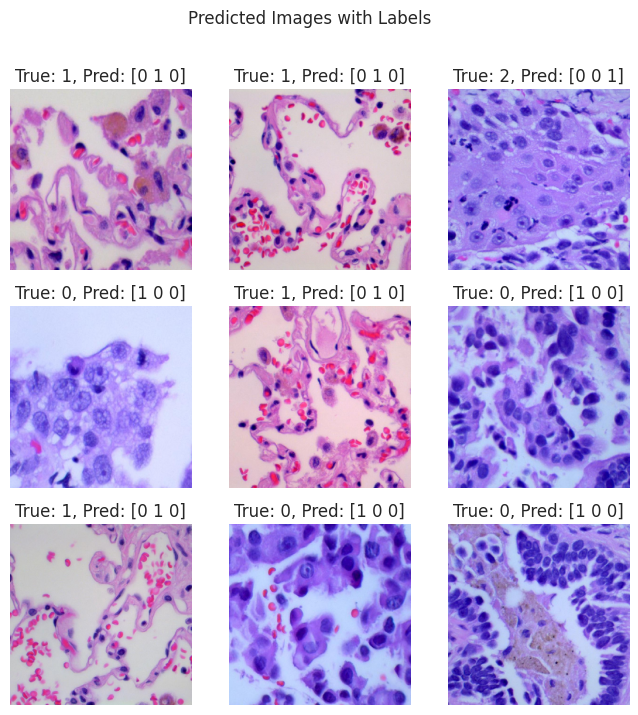

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_size = 299
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle('Predicted Images with Labels')

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(img_size, img_size, 3), cmap='gray')
    true_label_index = np.argmax(y_test[i])  # Index of 1 in the one-hot encoded label
    pred_label = inceptionResNetV2_pred_bool[i]
    ax.set_title(f'True: {true_label_index}, Pred: {pred_label}')
    ax.axis('off')

plt.show()

In [ ]:
# Make predictions on test images
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
print(predictions)
print(true_labels)

100/100 [==============================] - 1278s 13s/step
[[1.0840421e-03 9.9891603e-01 5.6056574e-08]
 [2.6527583e-04 9.9973470e-01 1.1337295e-08]
 [1.0495649e-01 1.0092017e-06 8.9504254e-01]
 ...
 [9.9492395e-01 4.3294849e-03 7.4647804e-04]
 [9.9636418e-01 9.6983740e-07 3.6349108e-03]
 [1.3960604e-02 9.8603916e-01 2.9237989e-07]]
[0 0 0 ... 2 2 2]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


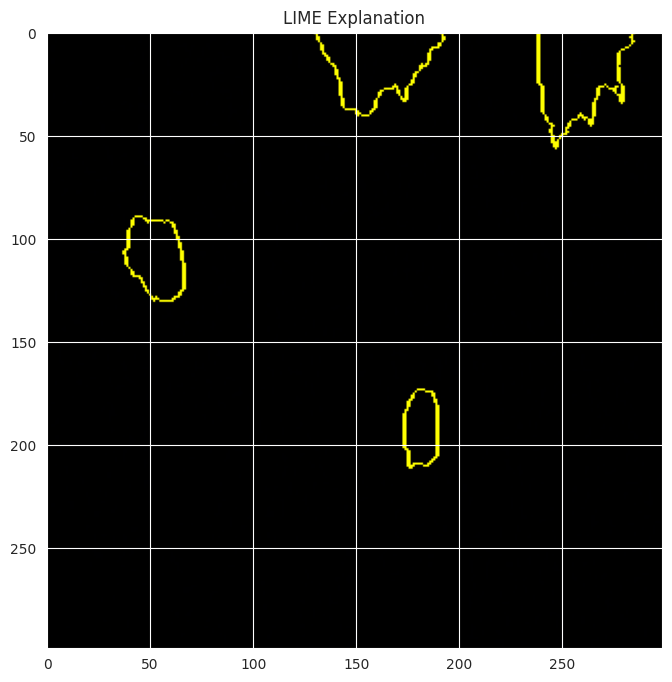

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Assuming your model is already defined and loaded as `model`
# Define an explainer
explainer = lime_image.LimeImageExplainer()

# Select a test image to explain
test_image = X_test[0]  # Adjust this to the appropriate test image from your dataset
test_image = test_image.reshape((299, 299, 3))  # Ensure the image is reshaped to (299, 299, 3)

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Explain the prediction on the selected image
explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0)

# Get the image and mask for the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

# Display the explanation
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title('LIME Explanation')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


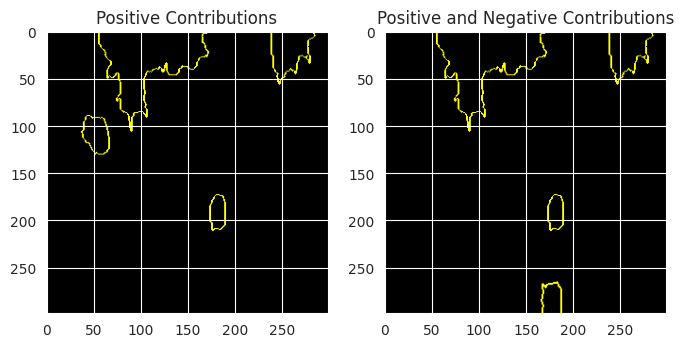

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Define an explainer
explainer = lime_image.LimeImageExplainer()

# Select a test image to explain
test_image = X_test[0]

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Explain the prediction on the selected image
explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0)

# Get the image and mask for positive contributions
temp_pos, mask_pos = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

# Get the image and mask for both positive and negative contributions
temp_all, mask_all = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False)

# Display the explanation for positive contributions
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(mark_boundaries(temp_pos / 255.0, mask_pos))
plt.title('Positive Contributions')

# Display the explanation for both positive and negative contributions
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp_all / 255.0, mask_all))
plt.title('Positive and Negative Contributions')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step


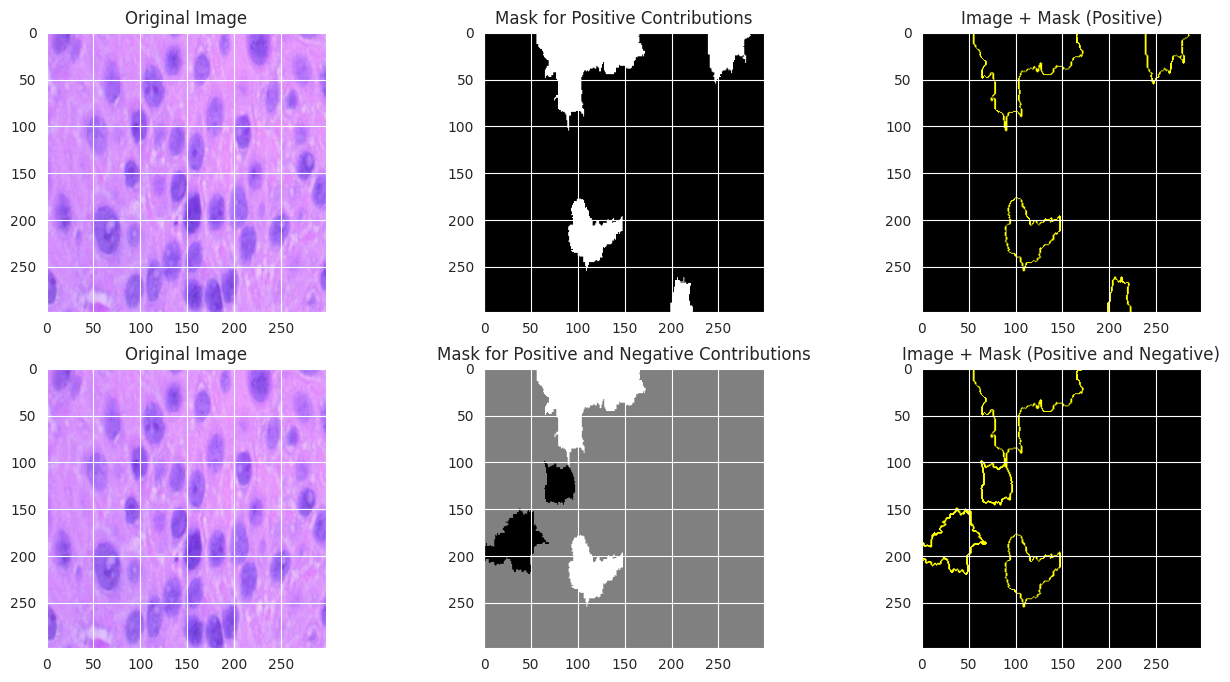

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Define an explainer
explainer = lime_image.LimeImageExplainer()

# Select a test image to explain
test_image = X_test[0]

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Explain the prediction on the selected image
explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0)

# Get the image and mask for positive contributions
temp_pos, mask_pos = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

# Get the image and mask for both positive and negative contributions
temp_all, mask_all = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False)

# Display the original image, mask, and combined image + mask for positive contributions
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(mask_pos, cmap='gray')
plt.title('Mask for Positive Contributions')

plt.subplot(2, 3, 3)
plt.imshow(mark_boundaries(test_image / 255.0, mask_pos))
plt.title('Image + Mask (Positive)')

# Display the original image, mask, and combined image + mask for both positive and negative contributions
plt.subplot(2, 3, 4)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 5)
plt.imshow(mask_all, cmap='gray')
plt.title('Mask for Positive and Negative Contributions')

plt.subplot(2, 3, 6)
plt.imshow(mark_boundaries(test_image / 255.0, mask_all))
plt.title('Image + Mask (Positive and Negative)')

plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


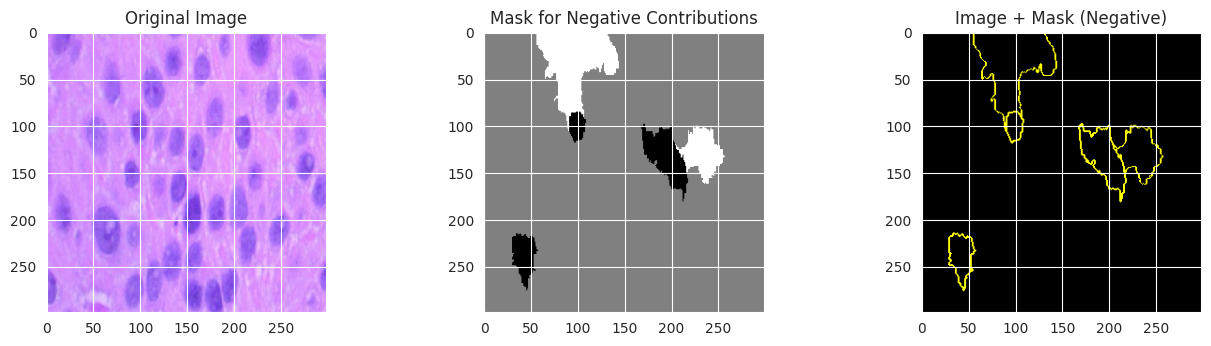

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Define an explainer
explainer = lime_image.LimeImageExplainer()

# Select a test image to explain
test_image = X_test[0]

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Explain the prediction on the selected image
explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0)

# Get the image and mask for only negative contributions
temp_neg, mask_neg = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False)

# Display the original image, mask, and combined image + mask for negative contributions
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(mask_neg, cmap='gray')
plt.title('Mask for Negative Contributions')

plt.subplot(2, 3, 3)
plt.imshow(mark_boundaries(test_image / 255.0, mask_neg))
plt.title('Image + Mask (Negative)')

plt.show()


1/1 [==============================] - 2s 2s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 66ms/step


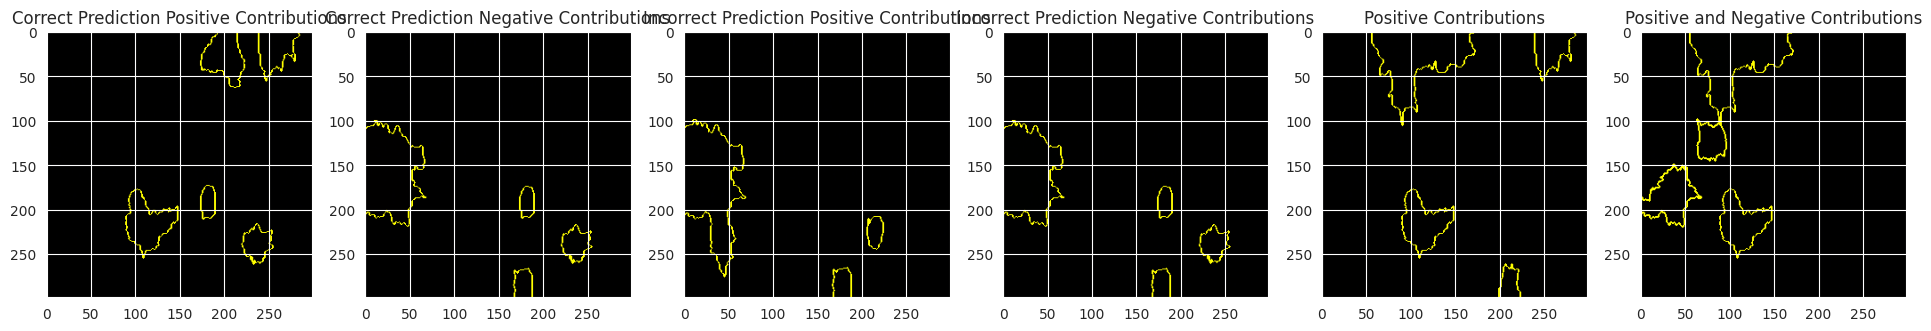

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Define an explainer
explainer = lime_image.LimeImageExplainer()

# Select a test image to explain
test_image = X_test[0]
true_label = np.argmax(y_test[0])  # Assuming the true label is known

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Get the predicted label for the test image
predicted_label = np.argmax(model.predict(test_image[np.newaxis, ...]), axis=1)[0]

# Explain the prediction on the selected image
explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0)

# Get the image and mask for positive contributions to the correct prediction
temp_correct_pos, mask_correct_pos = explanation.get_image_and_mask(predicted_label, positive_only=True, hide_rest=False)

# Get the image and mask for negative contributions to the correct prediction
temp_correct_neg, mask_correct_neg = explanation.get_image_and_mask(predicted_label, positive_only=False, hide_rest=False)

# Filter out only the negative contributions from the mask
mask_correct_neg = np.where(mask_correct_neg == 0, 1, 0)  # invert the mask to get negative contributions

# Check if there was an incorrect prediction
if predicted_label != true_label:
    incorrect_label = true_label
else:
    incorrect_label = explanation.top_labels[1]  # If the prediction was correct, use the next top label

# Get the image and mask for positive contributions to the incorrect prediction
temp_incorrect_pos, mask_incorrect_pos = explanation.get_image_and_mask(incorrect_label, positive_only=True, hide_rest=False)

# Get the image and mask for negative contributions to the incorrect prediction
temp_incorrect_neg, mask_incorrect_neg = explanation.get_image_and_mask(incorrect_label, positive_only=False, hide_rest=False)

# Filter out only the negative contributions from the mask
mask_incorrect_neg = np.where(mask_incorrect_neg == 0, 1, 0)  # invert the mask to get negative contributions

# Display the explanations
plt.figure(figsize=(24, 8))

# Display the explanation for correct prediction positive contributions
plt.subplot(1, 6, 1)
plt.imshow(mark_boundaries(temp_correct_pos / 255.0, mask_correct_pos))
plt.title('Correct Prediction Positive Contributions')

# Display the explanation for correct prediction negative contributions
plt.subplot(1, 6, 2)
plt.imshow(mark_boundaries(temp_correct_neg / 255.0, mask_correct_neg))
plt.title('Correct Prediction Negative Contributions')

# Display the explanation for incorrect prediction positive contributions
plt.subplot(1, 6, 3)
plt.imshow(mark_boundaries(temp_incorrect_pos / 255.0, mask_incorrect_pos))
plt.title('Incorrect Prediction Positive Contributions')

# Display the explanation for incorrect prediction negative contributions
plt.subplot(1, 6, 4)
plt.imshow(mark_boundaries(temp_incorrect_neg / 255.0, mask_incorrect_neg))
plt.title('Incorrect Prediction Negative Contributions')

# Display the explanation for positive contributions
plt.subplot(1, 6, 5)
plt.imshow(mark_boundaries(temp_pos / 255.0, mask_pos))
plt.title('Positive Contributions')

# Display the explanation for both positive and negative contributions
plt.subplot(1, 6, 6)
plt.imshow(mark_boundaries(temp_all / 255.0, mask_all))
plt.title('Positive and Negative Contributions')

plt.show()


1/1 [==============================] - 0s 42ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


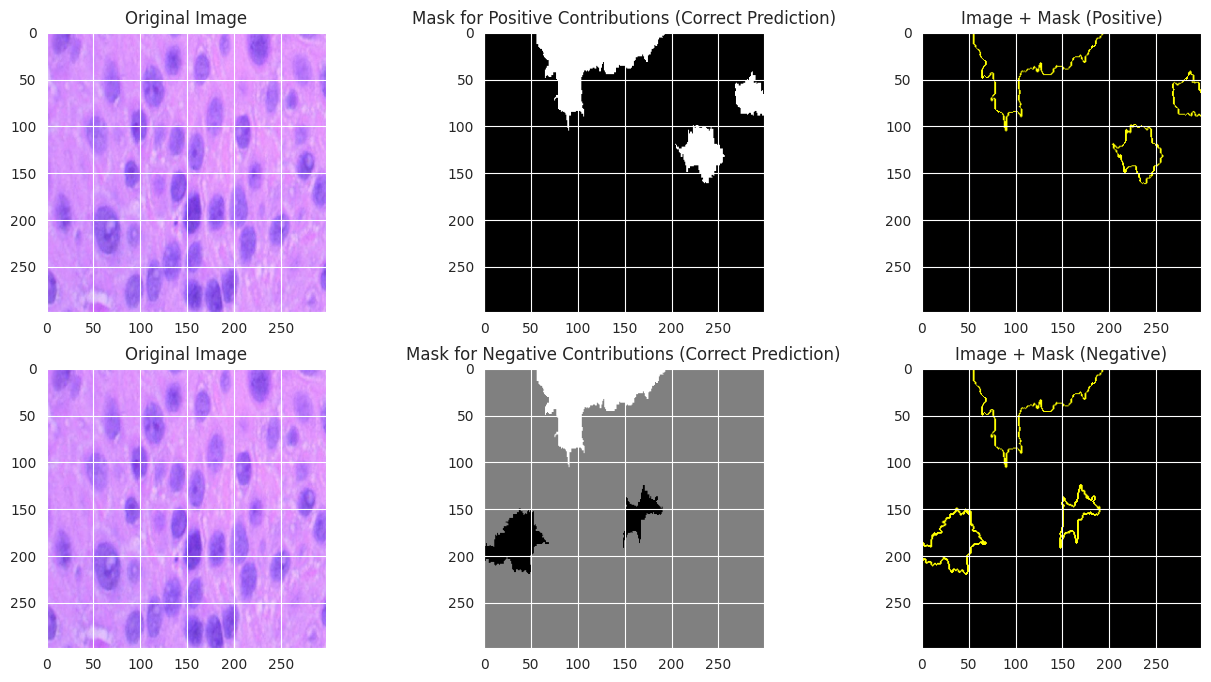

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Define an explainer
explainer = lime_image.LimeImageExplainer()

# Select a test image to explain
test_image = X_test[0]
true_label = np.argmax(y_test[0])  # Assuming the true label is known

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Get the predicted label for the test image
predicted_label = np.argmax(model.predict(test_image[np.newaxis, ...]), axis=1)[0]

# Explain the prediction on the selected image
explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0)

# Get the image and mask for positive contributions to the correct prediction
temp_correct_pos, mask_correct_pos = explanation.get_image_and_mask(predicted_label, positive_only=True, hide_rest=False)

# Get the image and mask for negative contributions to the correct prediction
temp_correct_neg, mask_correct_neg = explanation.get_image_and_mask(predicted_label, positive_only=False, hide_rest=False)

# Check if there was an incorrect prediction
if predicted_label != true_label:
    incorrect_label = true_label
else:
    incorrect_label = explanation.top_labels[1]  # If the prediction was correct, use the next top label

# Get the image and mask for positive contributions to the incorrect prediction
temp_incorrect_pos, mask_incorrect_pos = explanation.get_image_and_mask(incorrect_label, positive_only=True, hide_rest=False)

# Get the image and mask for negative contributions to the incorrect prediction
temp_incorrect_neg, mask_incorrect_neg = explanation.get_image_and_mask(incorrect_label, positive_only=False, hide_rest=False)

# Display the explanations
plt.figure(figsize=(16, 8))

# Display the original image, mask, and combined image with mask for correct prediction positive contributions
plt.subplot(2, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')
plt.subplot(2, 3, 2)
plt.imshow(mask_correct_pos, cmap='gray')
plt.title('Mask for Positive Contributions (Correct Prediction)')

plt.subplot(2, 3, 3)
plt.imshow(mark_boundaries(test_image / 255.0, mask_correct_pos))
plt.title('Image + Mask (Positive)')

# Display the original image, mask, and combined image with mask for correct prediction negative contributions
plt.subplot(2, 3, 4)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 5)
plt.imshow(mask_correct_neg, cmap='gray')
plt.title('Mask for Negative Contributions (Correct Prediction)')

plt.subplot(2, 3, 6)
plt.imshow(mark_boundaries(test_image / 255.0, mask_correct_neg))
plt.title('Image + Mask (Negative)')
'''
# Display the original image, mask, and combined image with mask for incorrect prediction positive contributions
plt.subplot(2, 3, 7)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 8)
plt.imshow(mask_incorrect_pos, cmap='gray')
plt.title('Mask for Positive Contributions (Incorrect Prediction)')

plt.subplot(2, 3, 9)
plt.imshow(mark_boundaries(test_image / 255.0, mask_incorrect_pos))
plt.title('Image + Mask (Positive)')

# Display the original image, mask, and combined image with mask for incorrect prediction negative contributions
plt.subplot(2, 3, 10)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 11)
plt.imshow(mask_incorrect_neg, cmap='gray')
plt.title('Mask for Negative Contributions (Incorrect Prediction)')

plt.subplot(2, 3, 12)
plt.imshow(mark_boundaries(test_image / 255.0, mask_incorrect_neg))
plt.title('Image + Mask (Negative)')
'''
plt.show()


1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


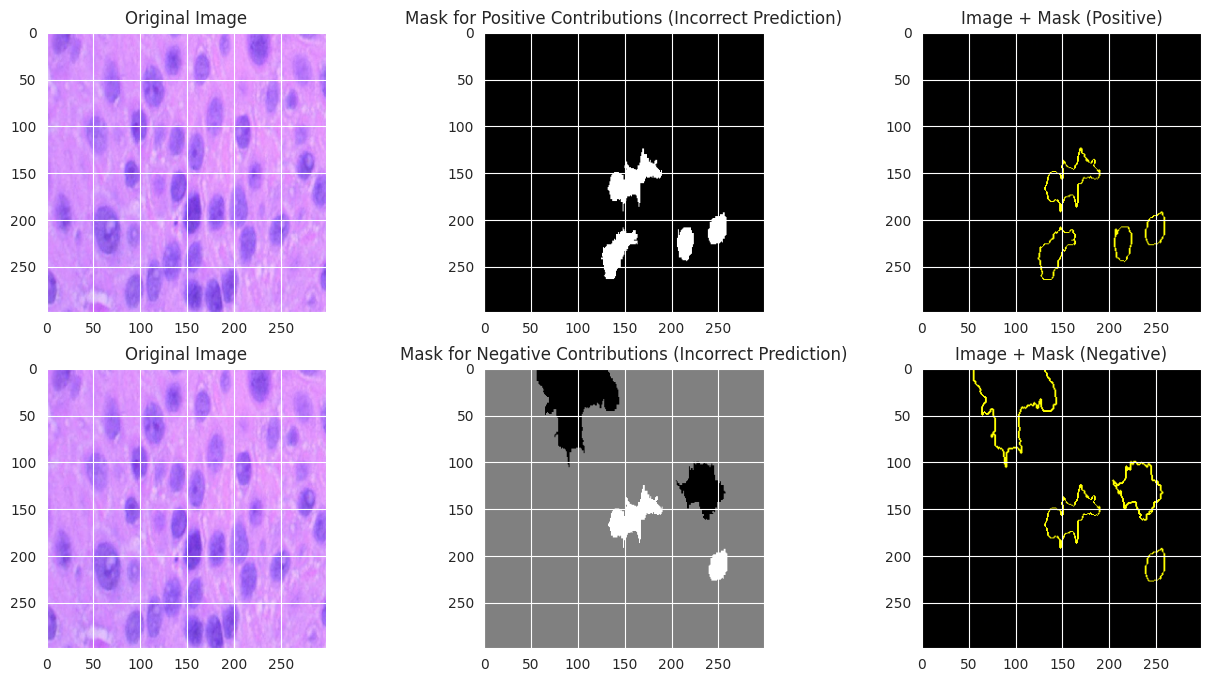

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Define an explainer
explainer = lime_image.LimeImageExplainer()

# Select a test image to explain
test_image = X_test[0]
true_label = np.argmax(y_test[0])  # Assuming the true label is known

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Get the predicted label for the test image
predicted_label = np.argmax(model.predict(test_image[np.newaxis, ...]), axis=1)[0]

# Explain the prediction on the selected image
explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0)

# Get the image and mask for positive contributions to the correct prediction
temp_correct_pos, mask_correct_pos = explanation.get_image_and_mask(predicted_label, positive_only=True, hide_rest=False)

# Get the image and mask for negative contributions to the correct prediction
temp_correct_neg, mask_correct_neg = explanation.get_image_and_mask(predicted_label, positive_only=False, hide_rest=False)

# Check if there was an incorrect prediction
if predicted_label != true_label:
    incorrect_label = true_label
else:
    incorrect_label = explanation.top_labels[1]  # If the prediction was correct, use the next top label

# Get the image and mask for positive contributions to the incorrect prediction
temp_incorrect_pos, mask_incorrect_pos = explanation.get_image_and_mask(incorrect_label, positive_only=True, hide_rest=False)

# Get the image and mask for negative contributions to the incorrect prediction
temp_incorrect_neg, mask_incorrect_neg = explanation.get_image_and_mask(incorrect_label, positive_only=False, hide_rest=False)

# Display the explanations
plt.figure(figsize=(16, 8))
'''
# Display the original image, mask, and combined image with mask for correct prediction positive contributions
plt.subplot(2, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(mask_correct_pos, cmap='gray')
plt.title('Mask for Positive Contributions (Correct Prediction)')

plt.subplot(2, 3, 3)
plt.imshow(mark_boundaries(test_image / 255.0, mask_correct_pos))
plt.title('Image + Mask (Positive)')

# Display the original image, mask, and combined image with mask for correct prediction negative contributions
plt.subplot(2, 3, 4)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 5)
plt.imshow(mask_correct_neg, cmap='gray')
plt.title('Mask for Negative Contributions (Correct Prediction)')

plt.subplot(2, 3, 6)
plt.imshow(mark_boundaries(test_image / 255.0, mask_correct_neg))
plt.title('Image + Mask (Negative)')
'''
# Display the original image, mask, and combined image with mask for incorrect prediction positive contributions
plt.subplot(2, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(mask_incorrect_pos, cmap='gray')
plt.title('Mask for Positive Contributions (Incorrect Prediction)')

plt.subplot(2, 3, 3)
plt.imshow(mark_boundaries(test_image / 255.0, mask_incorrect_pos))
plt.title('Image + Mask (Positive)')

# Display the original image, mask, and combined image with mask for incorrect prediction negative contributions
plt.subplot(2, 3, 4)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(2, 3, 5)
plt.imshow(mask_incorrect_neg, cmap='gray')
plt.title('Mask for Negative Contributions (Incorrect Prediction)')

plt.subplot(2, 3, 6)
plt.imshow(mark_boundaries(test_image / 255.0, mask_incorrect_neg))
plt.title('Image + Mask (Negative)')

plt.show()
